# Classifier Masza vs Rysia

### import tf

In [1]:
import tensorflow as tf

Let's see if GPU is avaiable

In [2]:
TF_CPP_MIN_LOG_LEVEL=2

In [3]:
gpu_available = tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2022-08-27 15:30:22.262375: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-27 15:30:22.417716: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 15:30:22.445609: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 15:30:22.445973: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built witho

In [4]:
gpu_available

True

Other solution

In [5]:
tf.config.list_physical_devices('GPU')

2022-08-27 15:30:23.039569: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 15:30:23.040093: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 15:30:23.040556: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

2022-08-27 15:30:23.052038: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18316342606106838558
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3621126144
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1926117100928878324
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

2022-08-27 15:30:23.052718: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 15:30:23.053090: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 15:30:23.053767: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 15:30:23.053781: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.
2022-08-27 15:30:23.054263: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read 

### import dependencies

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [8]:
data_dir = "./dataset/mycats_traningset/"
data_dir = pathlib.Path(data_dir)

In [9]:
data_dir

PosixPath('dataset/mycats_traningset')

In [10]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

100


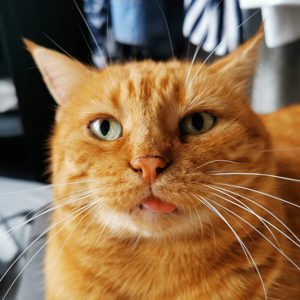

In [11]:
newsize = (300, 300)
masza = list(data_dir.glob('masza/*'))
PIL.Image.open(str(masza[1])).resize(newsize)

^ this is my beautiful cat Masza

## training set

In [12]:
batch_size = 16
img_height = 300
img_width = 300

In [13]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=321,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 100 files belonging to 2 classes.
Using 70 files for training.


2022-08-27 15:30:23.786108: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 15:30:23.786611: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 15:30:23.786985: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 15:30:23.787521: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-27 15:30:23.787534: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Could not ident

In [14]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=321,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 100 files belonging to 2 classes.
Using 30 files for validation.


In [15]:
class_names = train_ds.class_names
print(class_names)

['masza', 'rysia']


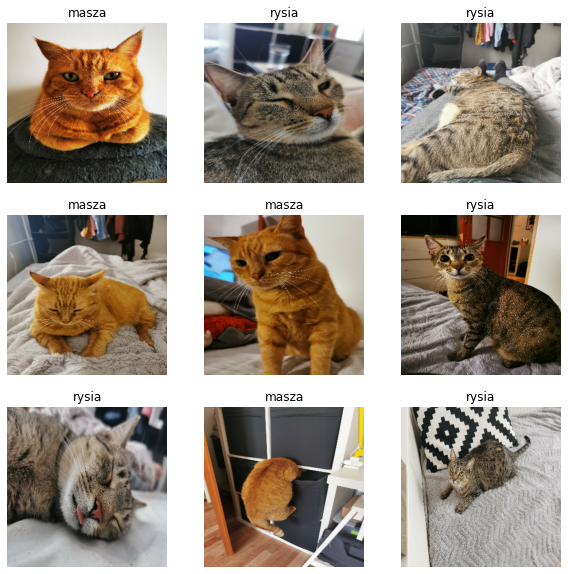

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [17]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [18]:
num_classes = len(class_names)
num_classes

2

In [19]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        1

In [22]:
# epochs based on prievous tests training acc vs val acc - 50 is optimal value
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


2022-08-27 15:30:26.808552: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-08-27 15:30:27.283837: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-08-27 15:30:27.446331: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


5/5 [==============================] - 3s 181ms/step - loss: 4.2915 - accuracy: 0.4000 - val_loss: 1.2307 - val_accuracy: 0.5333
Epoch 2/50
5/5 [==============================] - 0s 29ms/step - loss: 0.8494 - accuracy: 0.5000 - val_loss: 0.6912 - val_accuracy: 0.5333
Epoch 3/50
5/5 [==============================] - 0s 28ms/step - loss: 0.6885 - accuracy: 0.6143 - val_loss: 0.6637 - val_accuracy: 0.5333
Epoch 4/50
5/5 [==============================] - 0s 27ms/step - loss: 0.6516 - accuracy: 0.6000 - val_loss: 0.6033 - val_accuracy: 0.9667
Epoch 5/50
5/5 [==============================] - 0s 28ms/step - loss: 0.5055 - accuracy: 0.9429 - val_loss: 0.4354 - val_accuracy: 0.9667
Epoch 6/50
5/5 [==============================] - 0s 28ms/step - loss: 0.3075 - accuracy: 0.9429 - val_loss: 0.2235 - val_accuracy: 0.9333
Epoch 7/50
5/5 [==============================] - 0s 28ms/step - loss: 0.1759 - accuracy: 0.9571 - val_loss: 0.2387 - val_accuracy: 0.9000
Epoch 8/50
5/5 [=====================

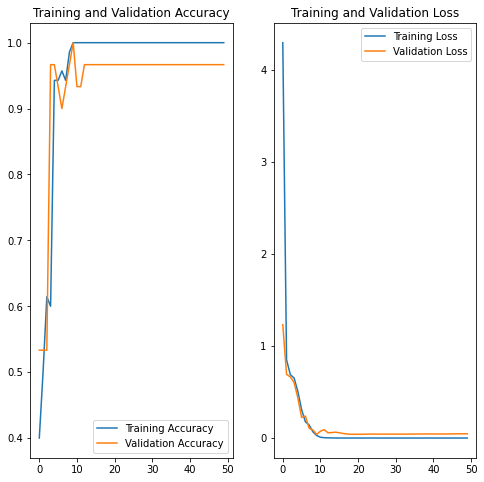

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

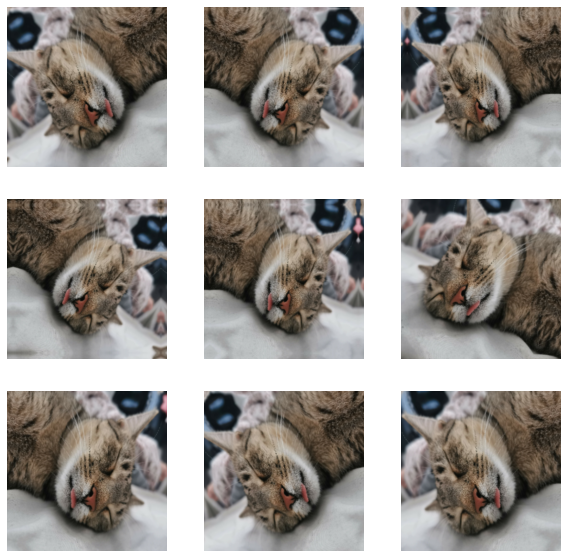

In [25]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [26]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 300, 300, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 150, 150, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                  

In [29]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
5/5 [==============================] - 1s 69ms/step - loss: 2.4159 - accuracy: 0.4571 - val_loss: 0.9274 - val_accuracy: 0.4667
Epoch 2/50
5/5 [==============================] - 0s 42ms/step - loss: 0.7352 - accuracy: 0.5143 - val_loss: 0.6680 - val_accuracy: 0.5000
Epoch 3/50
5/5 [==============================] - 0s 46ms/step - loss: 0.6717 - accuracy: 0.5714 - val_loss: 0.6336 - val_accuracy: 0.6333
Epoch 4/50
5/5 [==============================] - 0s 40ms/step - loss: 0.6638 - accuracy: 0.5429 - val_loss: 0.5892 - val_accuracy: 0.6333
Epoch 5/50
5/5 [==============================] - 0s 41ms/step - loss: 0.6395 - accuracy: 0.7000 - val_loss: 0.5399 - val_accuracy: 0.7333
Epoch 6/50
5/5 [==============================] - 0s 41ms/step - loss: 0.6032 - accuracy: 0.6857 - val_loss: 0.4836 - val_accuracy: 0.8333
Epoch 7/50
5/5 [==============================] - 0s 41ms/step - loss: 0.5511 - accuracy: 0.8571 - val_loss: 0.4230 - val_accuracy: 0.8000
Epoch 8/50
5/5 [===========

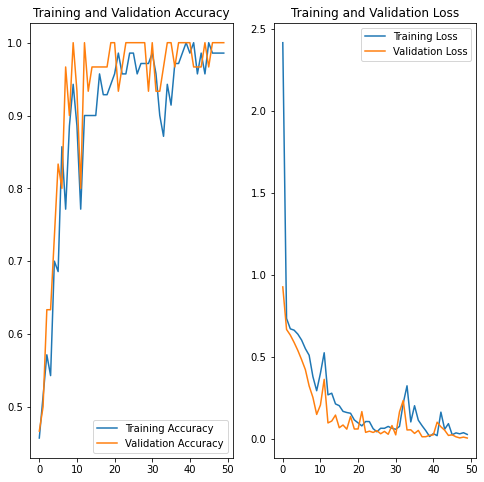

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
cats_nonseen = pathlib.Path("./dataset/mycats_nontraning/")
masza_nonseen = list(cats_nonseen.glob('masza*'))
rysia_nonseen = list(cats_nonseen.glob('rysia*'))
print(masza_nonseen, rysia_nonseen)

[PosixPath('dataset/mycats_nontraning/masza2.jpg'), PosixPath('dataset/mycats_nontraning/masza1.jpg')] [PosixPath('dataset/mycats_nontraning/rysia2.jpg'), PosixPath('dataset/mycats_nontraning/rysia1.jpg')]


In [32]:
rysia_nonseen[1]

PosixPath('dataset/mycats_nontraning/rysia1.jpg')

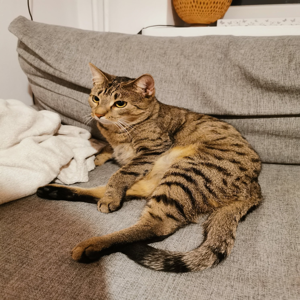

In [33]:
newsize = (300, 300)
PIL.Image.open(str(rysia_nonseen[1])).resize(newsize)

In [34]:
rysia_img_test = tf.keras.utils.load_img(
    str(rysia_nonseen[1]), target_size=(img_height, img_width)
)
r_img_array = tf.keras.utils.img_to_array(rysia_img_test)
r_img_array = tf.expand_dims(r_img_array, 0)
r_predictions = model.predict(r_img_array)
r_score = tf.nn.softmax(r_predictions[0])

1/1 [==============================] - 0s 129ms/step


In [35]:
print(
    "this picture presents `{}` with a `{:.2f}` percent confidence."
    .format(class_names[np.argmax(r_score)], 100 * np.max(r_score))
)

this picture presents `rysia` with a `100.00` percent confidence.


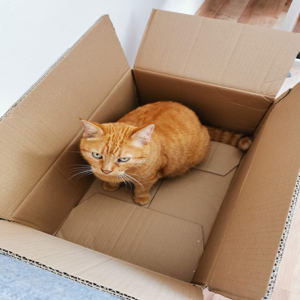

In [36]:
newsize = (300, 300)
PIL.Image.open(str(masza_nonseen[1])).resize(newsize)

In [37]:
masza_img_test = tf.keras.utils.load_img(
    str(masza_nonseen[0]), target_size=(img_height, img_width)
)
m_img_array = tf.keras.utils.img_to_array(masza_img_test)
m_img_array = tf.expand_dims(m_img_array, 0)
m_predictions = model.predict(m_img_array)
m_score = tf.nn.softmax(m_predictions[0])

1/1 [==============================] - 0s 12ms/step


In [38]:
print(
    "this picture presents `{}` with a `{:.2f}` percent confidence."
    .format(class_names[np.argmax(m_score)], 100 * np.max(m_score))
)

this picture presents `masza` with a `72.30` percent confidence.


# save model

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 300, 300, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 150, 150, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                  

In [40]:
model.save('models/model1')

INFO:tensorflow:Assets written to: models/model1/assets


INFO:tensorflow:Assets written to: models/model1/assets
